<a href="https://colab.research.google.com/github/ptran1203/photorealistic_style_transfer/blob/master/WCT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, output
import os
import json

%cd /content/
!rm -rf '/content/photorealistic_style_transfer'
!git clone https://github.com/ptran1203/photorealistic_style_transfer
%cd photorealistic_style_transfer
# Download dataset from kaggle

if not os.path.exists("/content/tfrecords"):
    !pip install -q kaggle
    kaggle_json = {
        "username": "ptran1203",
        "key": "<your_key>"
    }
    if not os.path.exists("~/.kaggle"):
        with open("kaggle.json", "w") as f:
            json.dump(kaggle_json, f)
        !mkdir ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download google-scraped-tfrecords
    !unzip google-scraped-tfrecords -d /content
    !rm google-scraped-tfrecords.zip
output.clear()

In [ ]:
from model import WCT2
from data_processing import build_input_pipe, restore_image
from utils import http_get_img, get_local_img, display_outputs
import tensorflow.keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

train_tfrec = "/content/tfrecords/train.tfrec"
val_tfrec = "/content/tfrecords/val.tfrec"

model = WCT2(image_size=None, lr=1e-4, gram_loss_weight=1.0)
model.wct.load_weights(model.checkpoint_path)
model.train(train_tfrec, epochs=10, batch_size=8)

In [ ]:
model.wct.save_weights(model.checkpoint_path)
# Test image recontruction

img = get_local_img(f"examples/input/in{np.random.randint(1, 60)}.png", None)
pred = model.wct.predict(img)
display_outputs(img[0], pred[0])
np.mean(np.square(pred - img))

Transfer in  0:00:00.693580


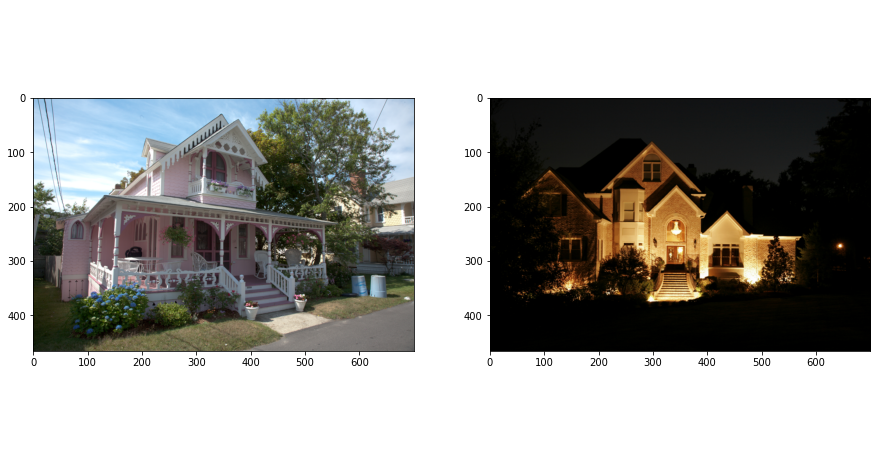

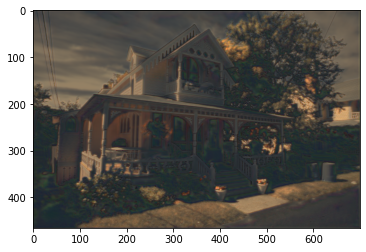

In [11]:
import datetime
import numpy as np
import cv2
from data_processing import preprocess_image
from ops import WhiteningAndColoring

rst = None
test_id = np.random.randint(1, 60)
test_id = 20

start = datetime.datetime.now()
content = get_local_img("examples/input/in{}.png".format(test_id), rst)
style = get_local_img("examples/style/tar{}.png".format(test_id), rst)

# content = http_get_img(
#     'https://github.com/clovaai/WCT2/blob/master/examples/content/in00.png?raw=true',
#     rst
# )

# style = http_get_img(
#     'https://github.com/clovaai/WCT2/blob/master/examples/style/in00.png?raw=true',
#     rst
# )
start = datetime.datetime.now()
output = model.transfer(content, style, 0.8)

print("Transfer in ", (datetime.datetime.now() - start))

display_outputs(
    content[0],
    style[0],
    output[0]
)


plt.imsave(f"output_{test_id}.png", output[0] / 255.0)